### <font color='blue'>Objective: </font>

In this assignment,
- You will implement and evaluate a K-Nearest Neighbors (KNN) regression model using the Boston Housing Dataset.
- You will implement with scikit-learn's built-in KNN regression and analyze the performance.

### Task 1: Load and Data Analysis [2 Marks]
1. Load the Boston Housing dataset from OpenML (ID=531).
2. Data Profiling:
  - Correlation HeatMap
  - Pairplot of Selected Features
  - Feature vs. Target (Scatter Plots)
  - Distribution of Target (MEDV)



### Task 2: Scaling and Splitting the data [1 Marks]
1. Scale the features so that all are in the same range (e.g., using Min-Max scaling).
2. Split the dataset into training and testing sets, with 80% training and 20% testing.

In [ ]:
!pip install openml

In [ ]:
# Solution code
import openml
import pandas as pd

In [ ]:
#Load the Boston Housing dataset from OpenML (ID=531).
dataset = openml.datasets.get_dataset(43465)

In [ ]:
dataset

OpenML Dataset
Name.........: Boston-house-price-data
Version......: 1
Format.......: arff
Upload Date..: 2022-03-23 13:23:22
Licence......: CC0: Public Domain
Download URL.: https://api.openml.org/data/v1/download/22102290/Boston-house-price-data.arff
OpenML URL...: https://www.openml.org/d/43465
# of features: None

In [ ]:
print(dataset.description)

Context
This dataset is extracted from the The Boston Housing Dataset, and the extraction of the data is explained in Extract dataset/dataframe from an URL
Acknowledgements
A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass.
Column description:
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.
The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics  Management, vol.5, 81-102, 1978.
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of resid

In [ ]:
X, y, is_categorical, feature_names = dataset.get_data( target=dataset.default_target_attribute)
print(X, y, is_categorical, feature_names)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [ ]:
df = pd.concat([X, y], axis=1)
df.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    uint8  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    uint8  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), uint8(2)
memory usage: 48.6 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


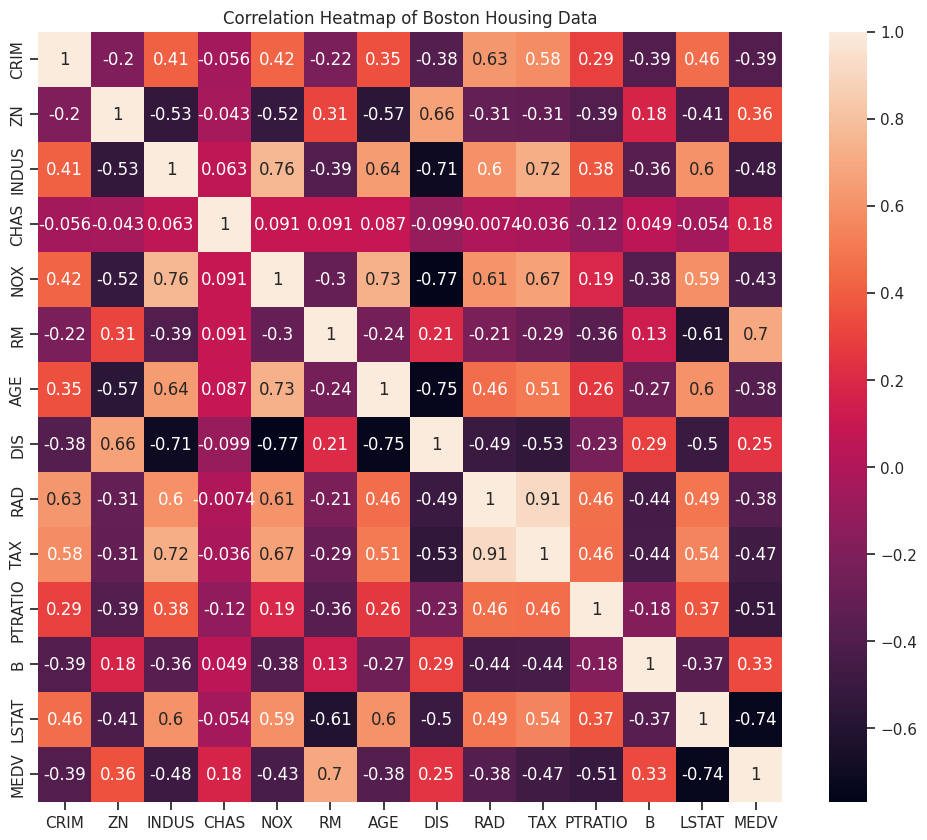

In [ ]:
#Data Profiling:
# Correlation HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, )
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()



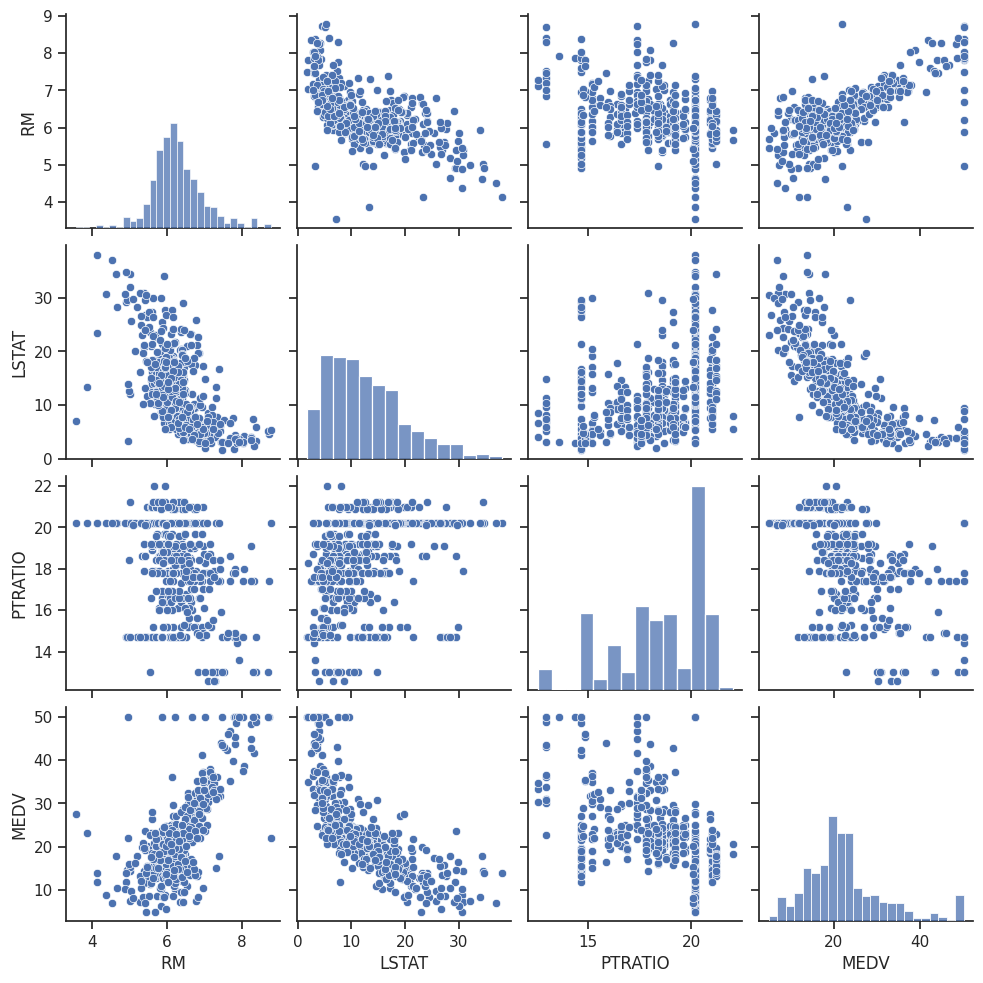

In [ ]:
#Pairplot of Selected Features
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
sns.pairplot(df[selected_features])
plt.show()

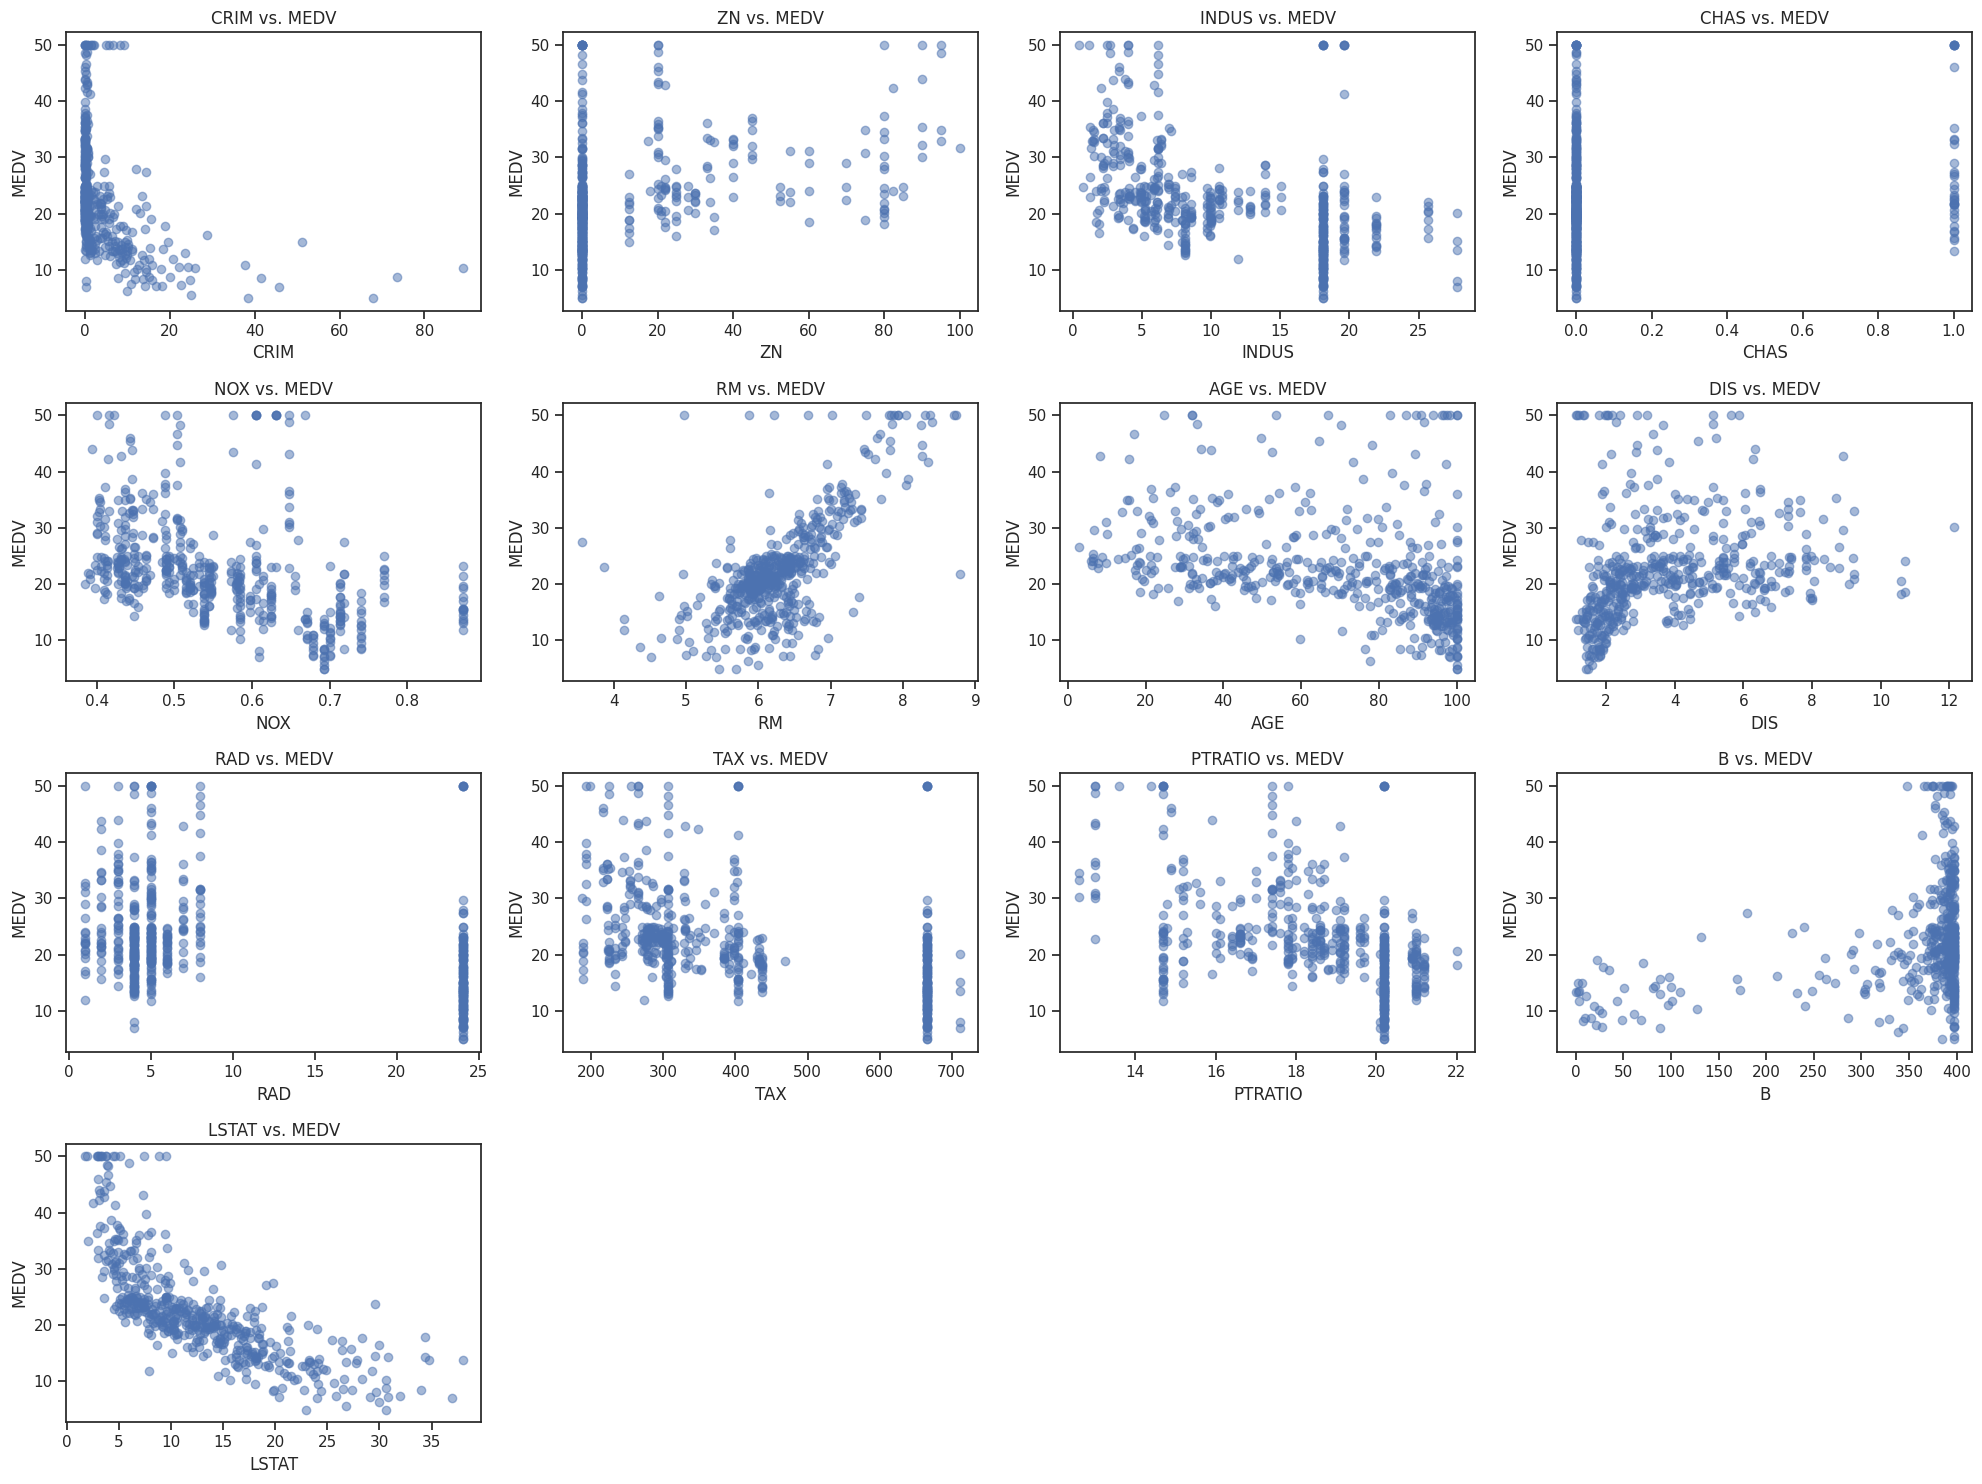

In [ ]:
#Feature vs. Target (Scatter Plots)
feature_cols = df.columns.drop('MEDV')
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_cols):
    plt.subplot(4, 4, i+1)
    plt.scatter(df[feature], df['MEDV'], alpha=0.5)
    plt.title(f'{feature} vs. MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()


In [ ]:
df['MEDV'].value_counts()

,count
MEDV,
50.0,16
25.0,8
23.1,7
22.0,7
21.7,7
...,...
12.6,1
16.4,1
17.7,1


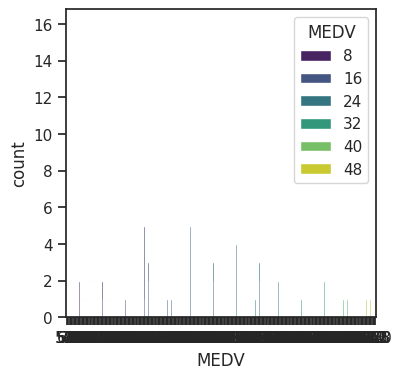

In [ ]:
#Distribution of Target (MEDV)
# Set the figure size
plt.figure(figsize=(4, 4))
# Create the count plot
sns.countplot(data=df, x="MEDV", hue="MEDV" , palette='viridis');

In [ ]:
#Scale the features so that all are in the same range (e.g., using Min-Max scaling).
from sklearn import preprocessing

# Initialize the scaler
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Print the first 5 rows of the scaled data
print(X_train_scaled[:5])

[[0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]]


In [ ]:
#Split the dataset into training and testing sets, with 80% training and 20% testing.
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Task 3: Implement KNN Regressor from Scratch [5 Marks]
1. Implement a KNN regressor from scratch- Simple Average
  
2. Support the following distance metrics:

  2.1. Euclidean distance

  2.2. Manhattan distance

  2.3. Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric) pa \

In [ ]:
from sklearn.metrics import r2_score


def Manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def Cosine_similarity(x, y):
    epsilon = 1e-8
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y) + epsilon)

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

class SimpleKNNRegressor:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train.values
        self.y_train = y_train.values

    def _compute_distance(self, x):
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [Manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'cosine':
            distances = [1 - Cosine_similarity(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")
        return np.array(distances)

    def predict(self, X_test):
        predictions = []
        for x in X_test.values:
            distances = self._compute_distance(x)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_targets = [self.y_train[i] for i in k_indices]
            prediction = np.mean(k_nearest_targets)
            predictions.append(prediction)
        return np.array(predictions)

k_values = [3, 5, 7, 9, 11]
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results_simple_knn = {}

for k in k_values:
    for metric in distance_metrics:
        knn_regressor = SimpleKNNRegressor(k=k, distance_metric=metric)
        knn_regressor.fit(X_train, y_train)
        y_pred = knn_regressor.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results_simple_knn[(k, metric)] = r2

# Create a table summarizing the R² scores for each (k, distance metric) pair.
results_table_simple = pd.DataFrame(list(results_simple_knn.items()), columns=['Parameters', 'R² Score'])
results_table_simple[['k', 'Distance Metric']] = pd.DataFrame(results_table_simple['Parameters'].tolist(), index=results_table_simple.index)
results_table_simple = results_table_simple.pivot(index='k', columns='Distance Metric', values='R² Score')

print("R² Scores for Simple KNN Regressor:")
display(results_table_simple)

R² Scores for Simple KNN Regressor:


Distance Metric,cosine,euclidean,manhattan
k,,,
3,0.614301,0.624306,0.674614
5,0.565825,0.555663,0.615501
7,0.520299,0.444377,0.574847
9,0.471150,0.422552,0.560877
11,0.497456,0.446904,0.544677


### Task 4: Compare with scikit-learn Simple KNN [3 Marks]
1. Identify the (k, distance metric) combination that gave the best R² score from your custom implementation.
2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute', weights='uniform', and the same (k, distance metric) to train and test on the dataset.
3. Compare the R² score of the scikit-learn model with your custom implementation for that best configuration

In [ ]:
# Solution code
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

best_r2_simple = results_table_simple.max().max()
best_metric_simple = results_table_simple.max(axis=0).idxmax()
best_k_simple = results_table_simple[best_metric_simple].idxmax()

print(f"Best R² from custom simple KNN: {best_r2_simple:.4f}")
print(f"Best k for simple KNN: {best_k_simple}")
print(f"Best distance metric for simple KNN: {best_metric_simple}")


sklearn_metric = best_metric_simple
if best_metric_simple == 'manhattan':
    sklearn_metric = 'manhattan'
elif best_metric_simple == 'euclidean':
    sklearn_metric = 'euclidean'
elif best_metric_simple == 'cosine':
    sklearn_metric = 'cosine'

sklearn_knn_simple = KNeighborsRegressor(n_neighbors=best_k_simple, algorithm='brute', weights='uniform', metric=sklearn_metric)
sklearn_knn_simple.fit(X_train, y_train)
y_pred_sklearn_simple = sklearn_knn_simple.predict(X_test)
r2_sklearn_simple = r2_score(y_test, y_pred_sklearn_simple)

print(f"\nR² score of scikit-learn simple KNN ({best_k_simple}, {best_metric_simple}): {r2_sklearn_simple:.4f}")
print(f"\nComparison:")
print(f"Custom Simple KNN R² ({best_k_simple}, {best_metric_simple}): {best_r2_simple:.4f}")
print(f"Scikit-learn Simple KNN R² ({best_k_simple}, {best_metric_simple}): {r2_sklearn_simple:.4f}")

Best R² from custom simple KNN: 0.6746
Best k for simple KNN: 3
Best distance metric for simple KNN: manhattan

R² score of scikit-learn simple KNN (3, manhattan): 0.6746

Comparison:
Custom Simple KNN R² (3, manhattan): 0.6746
Scikit-learn Simple KNN R² (3, manhattan): 0.6746


### Task 5: Implement Weighted KNN Regressor from Scratch [3 Marks]
1. Implement a weighted average KNN regressor from scratch, where weights are the inverse of the distance to neighbors.
  
2. Support the following distance metrics:

  2.1. Euclidean distance

  2.2. Manhattan distance

  2.3. Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric) pair.

In [ ]:
class WeightedKNNRegressor:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train.values
        self.y_train = y_train.values

    def _compute_distance(self, x):
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [Manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'cosine':
            distances = [1 - Cosine_similarity(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")
        return np.array(distances)

    def predict(self, X_test):
        predictions = []
        for x in X_test.values:
            distances = self._compute_distance(x)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_targets = [self.y_train[i] for i in k_indices]
            k_nearest_distances = distances[k_indices]
            weights = 1 / (k_nearest_distances + 1e-8)
            prediction = np.sum(weights * k_nearest_targets) / np.sum(weights)
            predictions.append(prediction)
        return np.array(predictions)

k_values = [3, 5, 7, 9, 11]
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results_weighted_knn = {}

for k in k_values:
    for metric in distance_metrics:
        knn_regressor = WeightedKNNRegressor(k=k, distance_metric=metric)
        knn_regressor.fit(X_train, y_train)
        y_pred = knn_regressor.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results_weighted_knn[(k, metric)] = r2
results_table_weighted = pd.DataFrame(list(results_weighted_knn.items()), columns=['Parameters', 'R² Score'])
results_table_weighted[['k', 'Distance Metric']] = pd.DataFrame(results_table_weighted['Parameters'].tolist(), index=results_table_weighted.index)
results_table_weighted = results_table_weighted.pivot(index='k', columns='Distance Metric', values='R² Score')

print("R² Scores for Weighted KNN Regressor:")
display(results_table_weighted)

R² Scores for Weighted KNN Regressor:


Distance Metric,cosine,euclidean,manhattan
k,,,
3,0.637576,0.625390,0.681240
5,0.608002,0.583296,0.641434
7,0.585374,0.505633,0.612909
9,0.560631,0.491354,0.611304
11,0.575272,0.507284,0.598859


### Task 6: Compare with scikit-learn Weighted KNN [2 Marks]
1. Identify the best (k, distance metric) combination from your weighted KNN results.

2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute' and weights='distance' for the same (k, distance metric).

In [ ]:
best_r2_weighted = results_table_weighted.max().max()
best_metric_weighted = results_table_weighted.max(axis=0).idxmax()
best_k_weighted = results_table_weighted[best_metric_weighted].idxmax()

print(f"Best R² from custom weighted KNN: {best_r2_weighted:.4f}")
print(f"Best k for weighted KNN: {best_k_weighted}")
print(f"Best distance metric for weighted KNN: {best_metric_weighted}")

sklearn_metric_weighted = best_metric_weighted
if best_metric_weighted == 'manhattan':
    sklearn_metric_weighted = 'manhattan'
elif best_metric_weighted == 'euclidean':
    sklearn_metric_weighted = 'euclidean'
elif best_metric_weighted == 'cosine':
    sklearn_metric_weighted = 'cosine'

sklearn_knn_weighted = KNeighborsRegressor(n_neighbors=best_k_weighted, algorithm='brute', weights='distance', metric=sklearn_metric_weighted)
sklearn_knn_weighted.fit(X_train, y_train)
y_pred_sklearn_weighted = sklearn_knn_weighted.predict(X_test)
r2_sklearn_weighted = r2_score(y_test, y_pred_sklearn_weighted)
print(f"\nR² score of scikit-learn weighted KNN ({best_k_weighted}, {best_metric_weighted}): {r2_sklearn_weighted:.4f}")

print(f"\nComparison:")
print(f"Custom Weighted KNN R² ({best_k_weighted}, {best_metric_weighted}): {best_r2_weighted:.4f}")
print(f"Scikit-learn Weighted KNN R² ({best_k_weighted}, {best_metric_weighted}): {r2_sklearn_weighted:.4f}")

Best R² from custom weighted KNN: 0.6812
Best k for weighted KNN: 3
Best distance metric for weighted KNN: manhattan

R² score of scikit-learn weighted KNN (3, manhattan): 0.6812

Comparison:
Custom Weighted KNN R² (3, manhattan): 0.6812
Scikit-learn Weighted KNN R² (3, manhattan): 0.6812


### Task 7: Reporting and Visualization [3 Marks]
1. Plot the R² scores for both simple and weighted KNN from your implementation across different k and distance metrics (heatmap or line plots).

2. Plot corresponding R² scores from scikit-learn for the same parameters.

3. Compare the R² scores of scikit-learn weighted KNN with your custom weighted KNN for the best combination.

4. Plotting the Scatter Plots of the actual and predicted datapoints

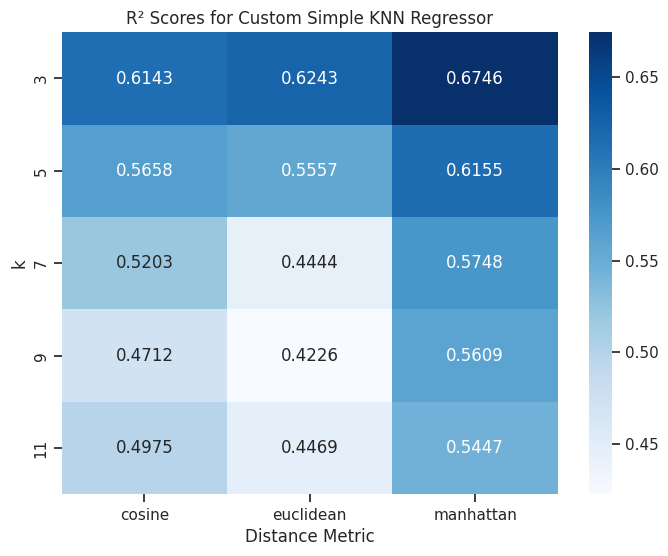

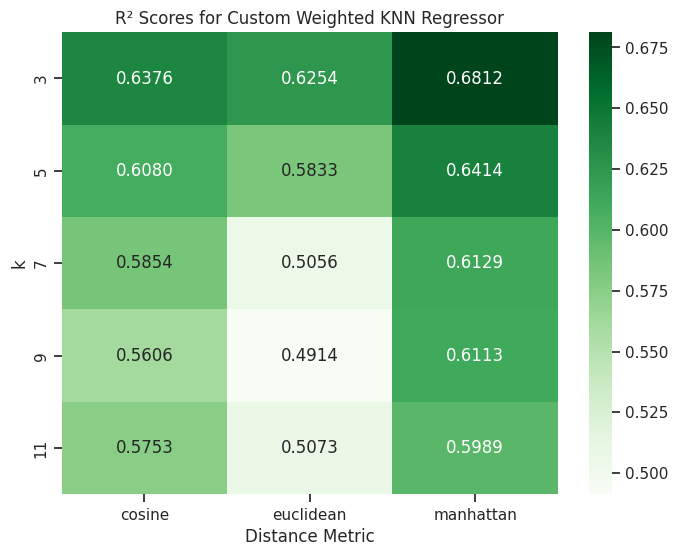


Comparison of R² scores for the best weighted KNN configuration (3, manhattan):
Custom Weighted KNN R²: 0.6812
Scikit-learn Weighted KNN R²: 0.6812


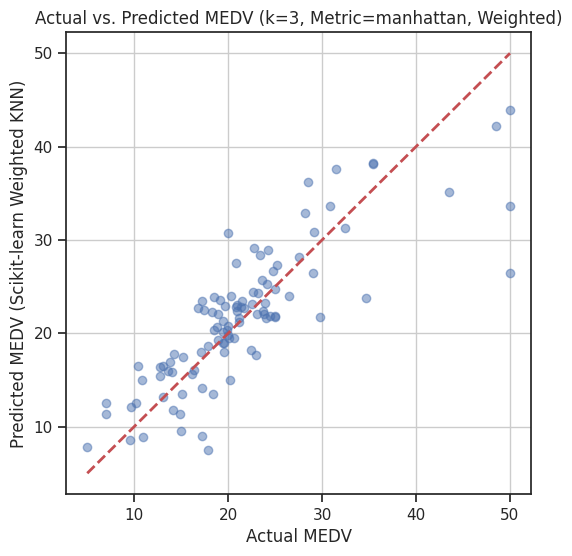

In [ ]:
# Solution code
# Heatmap for Simple KNN
plt.figure(figsize=(8, 6))
sns.heatmap(results_table_simple, annot=True, cmap='Blues', fmt=".4f")
plt.title('R² Scores for Custom Simple KNN Regressor')
plt.xlabel('Distance Metric')
plt.ylabel('k')
plt.show()

# Heatmap for Weighted KNN
plt.figure(figsize=(8, 6))
sns.heatmap(results_table_weighted, annot=True, cmap='Greens', fmt=".4f")
plt.title('R² Scores for Custom Weighted KNN Regressor')
plt.xlabel('Distance Metric')
plt.ylabel('k')
plt.show()


print(f"\nComparison of R² scores for the best weighted KNN configuration ({best_k_weighted}, {best_metric_weighted}):")
print(f"Custom Weighted KNN R²: {best_r2_weighted:.4f}")
print(f"Scikit-learn Weighted KNN R²: {r2_sklearn_weighted:.4f}")
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_sklearn_weighted, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV (Scikit-learn Weighted KNN)")
plt.title(f"Actual vs. Predicted MEDV (k={best_k_weighted}, Metric={best_metric_weighted}, Weighted)")
plt.grid(True)
plt.show()

### Task 8: Summarize your findings: [1 Mark]

- Which (k, distance metric) performed best?

- How does your implementation compare with scikit-learn?

- Discuss any observations regarding distance metrics or weighting.

The best performance across all models was seen with k=3 and Manhattan distance, which consistently gave the highest R² scores in both simple and weighted KNN.
When compared with scikit-learn’s KNeighborsRegressor, your custom implementations (both simple and weighted) matched the results exactly when using the same parameters. This confirms that your versions are accurate and align with the library’s behavior.

##Key Insights:
###Distance Metrics:
Manhattan distance outperformed both Euclidean and Cosine distances, suggesting that absolute differences work better than squared differences or angle-based measures for this housing dataset.

###Weighting:
Weighted KNN (using inverse distance) slightly improved prediction accuracy, especially for certain combinations of k and distance metrics, indicating that closer neighbors often carry more useful information.

#Conclusion:
Choosing the right distance metric and applying distance-based weighting can significantly impact KNN regression performance. Your implementations not only performed well but also closely mirrored scikit-learn's models.